In [1]:
import pandas as pd, pickle, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib as mpl
import matplotlib.lines as mlines
from datetime import datetime, timedelta

# Visual Analysis of the Coronavirus Pandemic (State and County Level)
* CDC cases and death information
* Safegraph county census data
* Google mobility data

## Update Data and Import Graphing Functions

In [2]:
with open('covid_data.p', 'rb') as f:
    data = pickle.load(f)

In [3]:
cols = ['deaths_cdc','confirmed_cdc','state_code','fips_code','date',
       'pir_grp','unins_grp','pop_density_grp','e_grp','r_w_grp','age_55_plus_grp',
        'rep','pop_total','county_name','deaths_per_100k','retail_and_recreation_percent_change_from_baseline_goog_cnty', 
        'workplaces_percent_change_from_baseline_goog_cnty']
data = data[cols]
data = data[data.date < '2021-08-15']

In [4]:
%run graphFunctions.ipynb

In [5]:
print("Total Deaths :", data[data.date == data.date.max()- timedelta(days=0)].deaths_cdc.sum())

Total Deaths : 614505.0


## Section 1: Statewide Totals

### Figure 1.1: Deaths by State

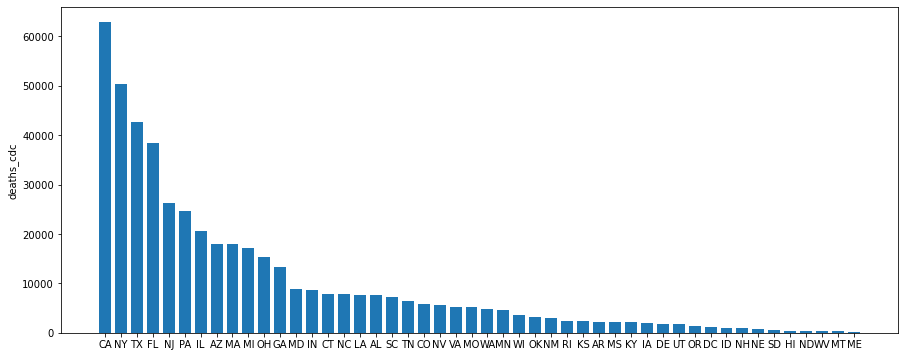

In [6]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc', 200)

### Figure 1.2: Deaths per 100,000 People

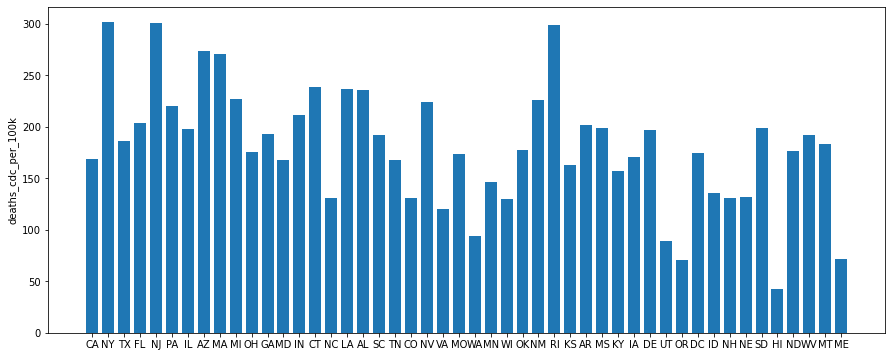

In [7]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc_per_100k', 200)

### Figure 1.3: Cases and Deaths (Total, Per 100k People) - All States

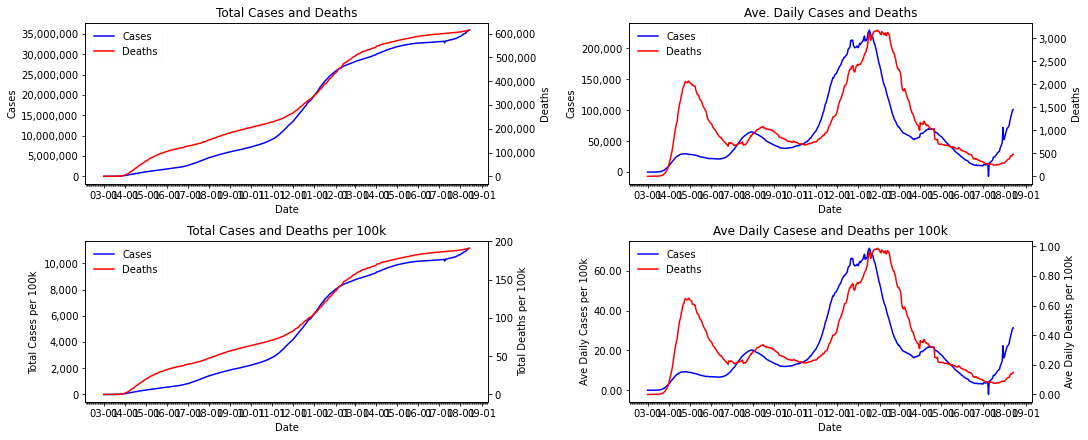

In [8]:
states=data.state_code.unique()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.4: Cases and Deaths (Total, Per 100k People) - Northeast

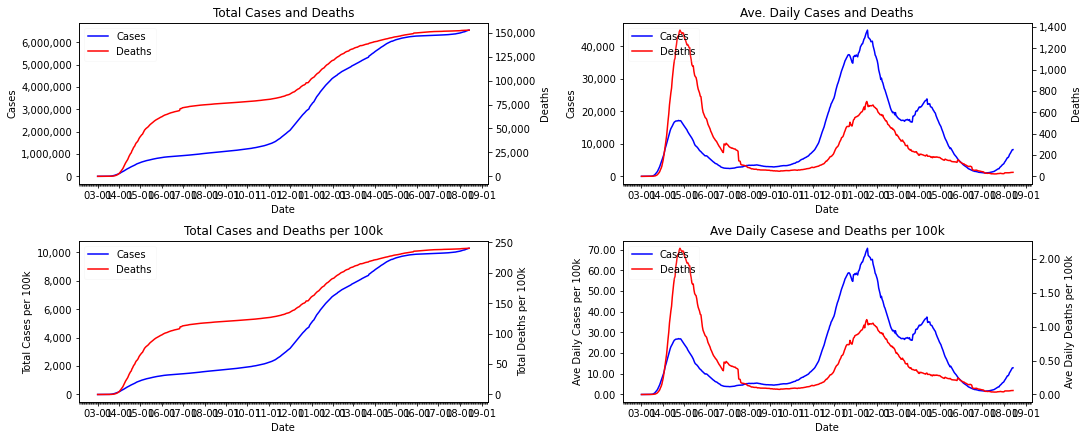

In [9]:
states = getStatesInRegion("N").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.5: Cases and Deaths (Total, Per 100k People) - South

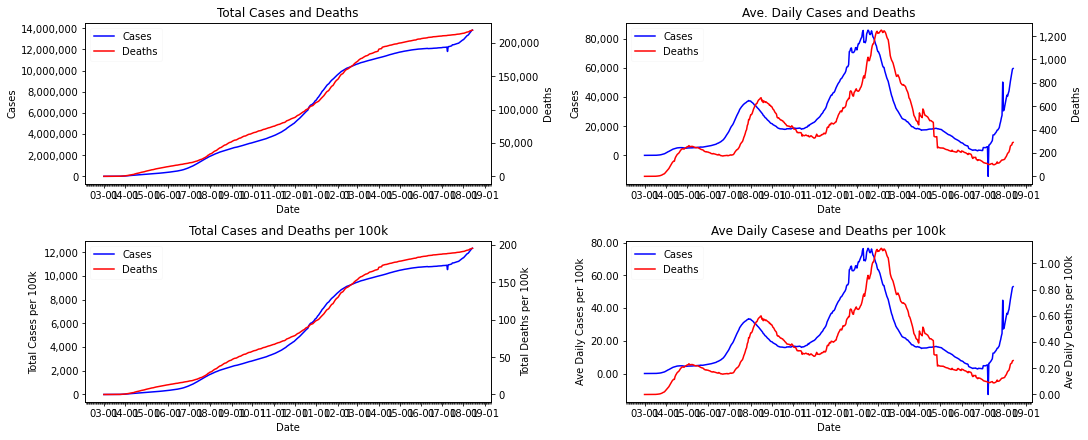

In [10]:
states = getStatesInRegion("S").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.6: Cases and Deaths (Total, Per 100k People) - Midwest

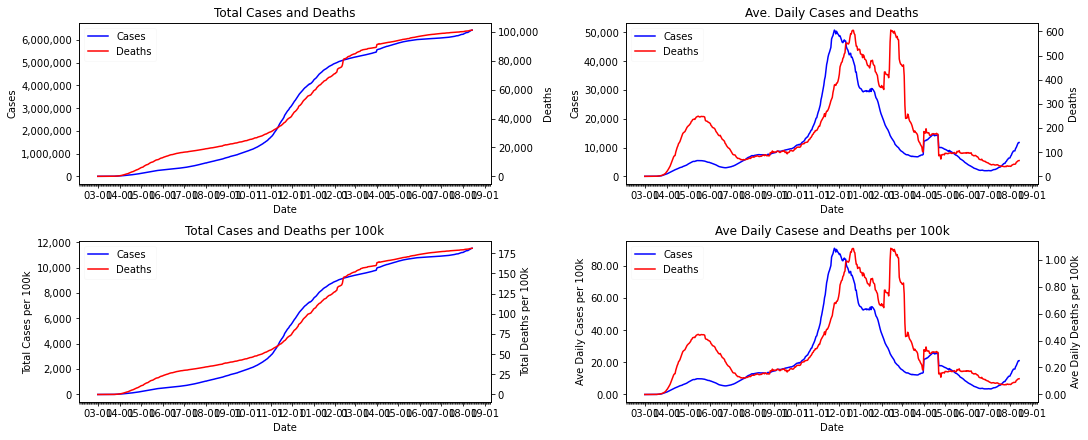

In [11]:
states = getStatesInRegion("M").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.7: Cases and Deaths (Total, Per 100k People) - West

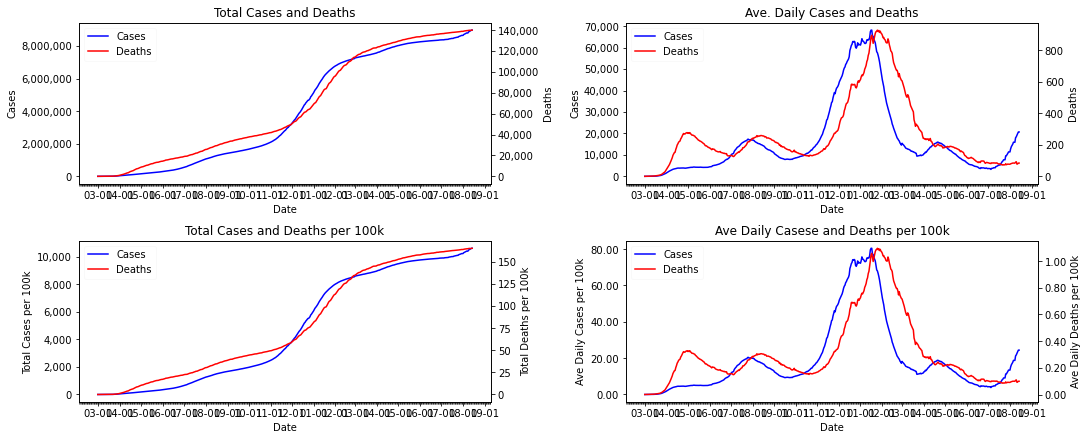

In [12]:
states = getStatesInRegion("W").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

## Section 2: State Caparison by Region (Northeast, South, Midwest, West, Other)

### Figure 2.1:  Deaths - 14 Day Average - Northeast

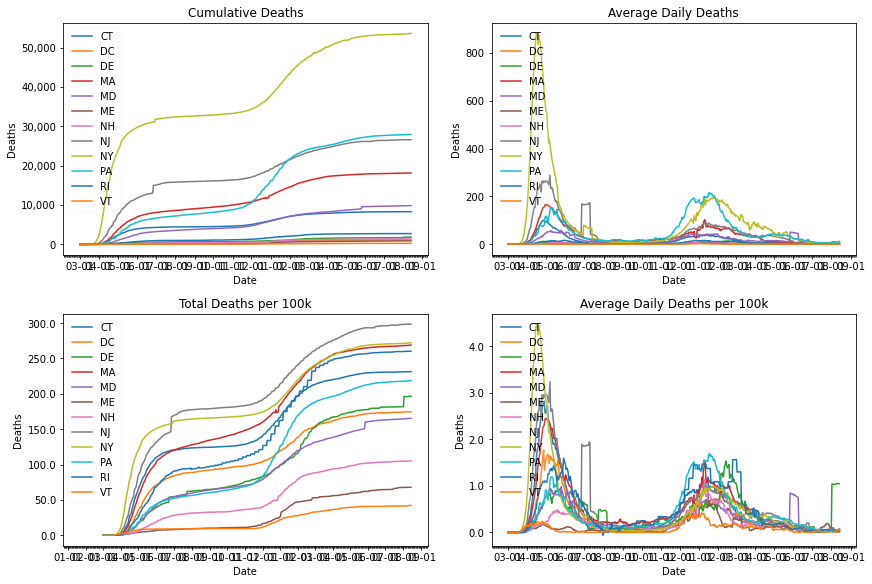

In [13]:
states = getStatesInRegion("N").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

### Figure 2.2:  Deaths - 14 Day Average - South

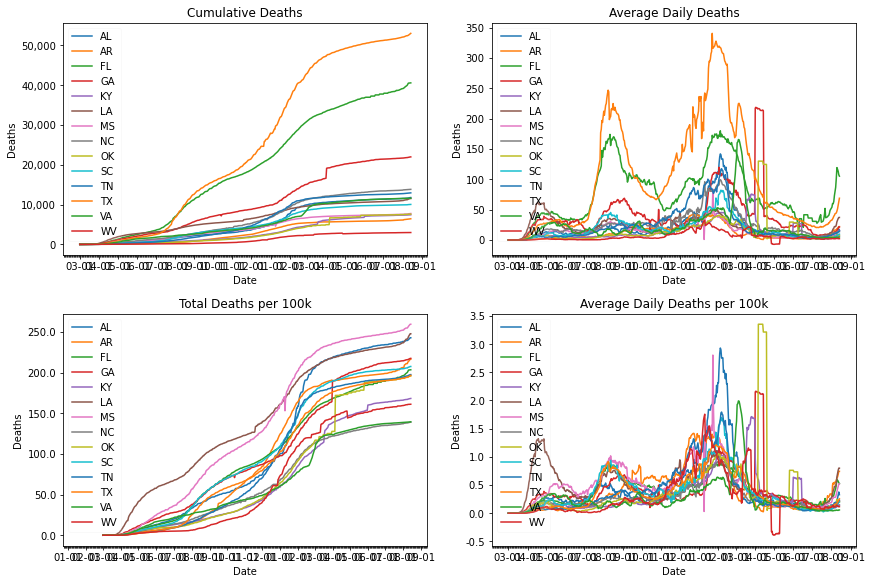

In [14]:
states = getStatesInRegion("S").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

### Figure 2.3:  Deaths - 14 Day Average - Midwest

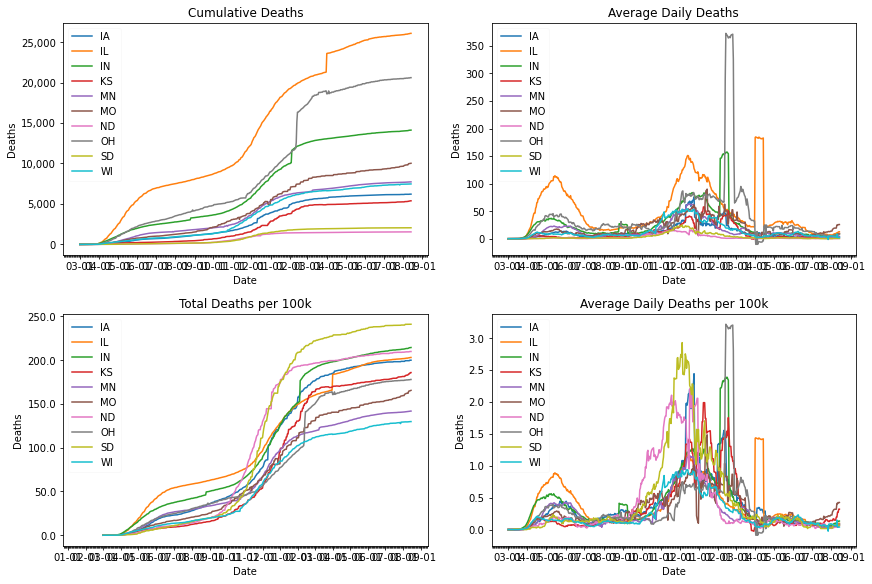

In [15]:
states = getStatesInRegion("M").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

### Figure 2.4:  Deaths - 14 Day Average - West

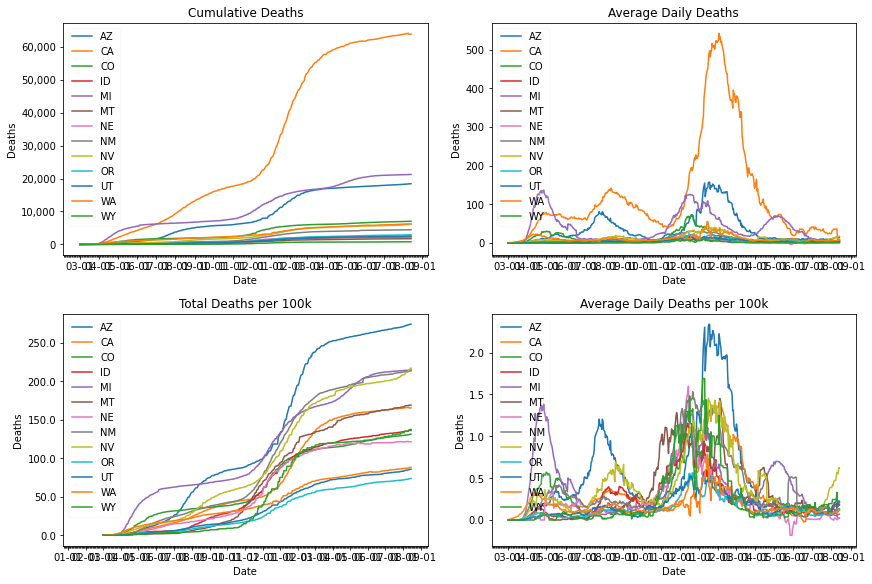

In [16]:
states = getStatesInRegion("W").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

## Section 3: County Attribute Analysis Across All States

* Available fields: pir_grp, unins_grp, pop_density_grp, e_grp, r_b_grp, r_w_grp, age_55_plus_grp

In [17]:
states = list(data.state_code.unique())

### Figure 3.1: Population Density

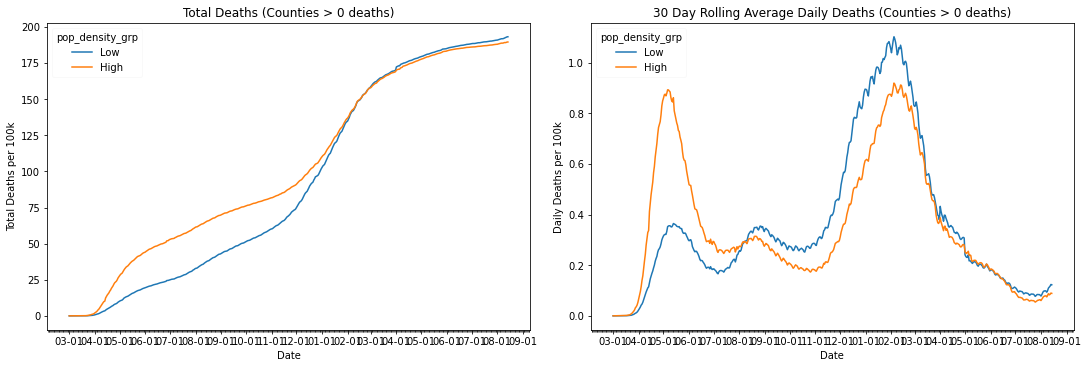

In [18]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pop_density_grp', start_date='2020-03-01')

### Figure 3.2: Race

The race definition used here is 'white' as reported in census data.  Low would be 'non-white' and high would be 'white'.

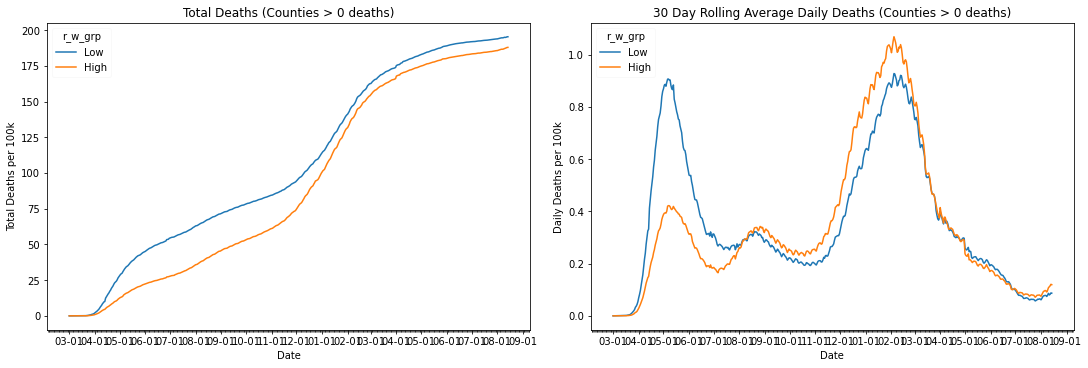

In [19]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='r_w_grp', start_date='2020-03-01')

### Figure 3.2: Uninsured

'Low' are the counties with the lowest percentages of uninsured individuals.

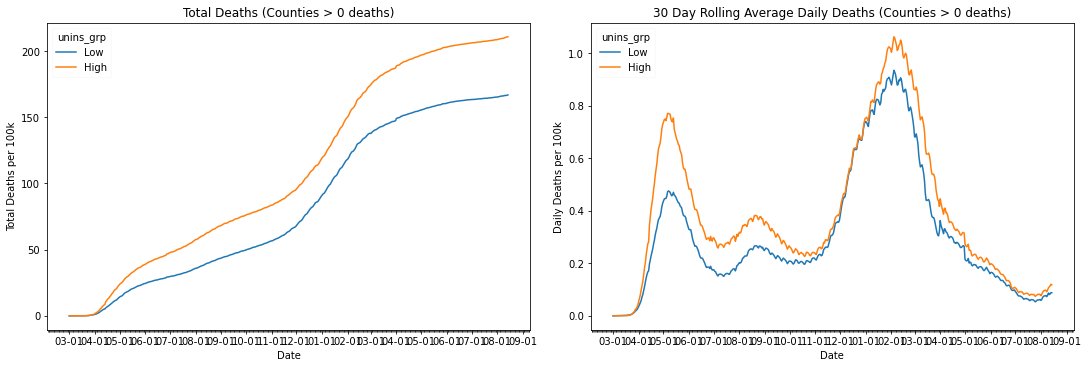

In [20]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='unins_grp', start_date='2020-03-01')

### Figure 3.3: Poverty Income Ratio

'High' are the counties with the highest percentage of PIR > 200%

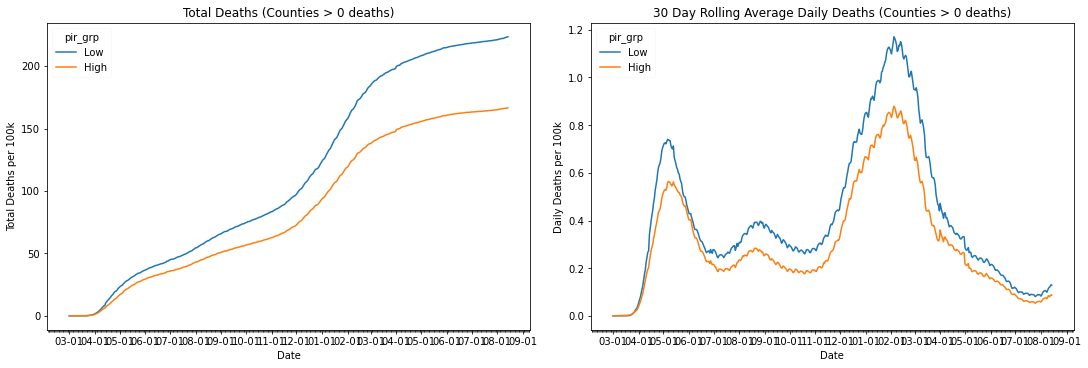

In [21]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pir_grp', start_date='2020-03-01')

### Figure 3.4: 2020 Election Outcome

'High' is 'Republican' and 'Low' is 'Democrat' vote in 2020 presidential election.

#### Figure 3.4.1: 2020 Election Outcome - All States

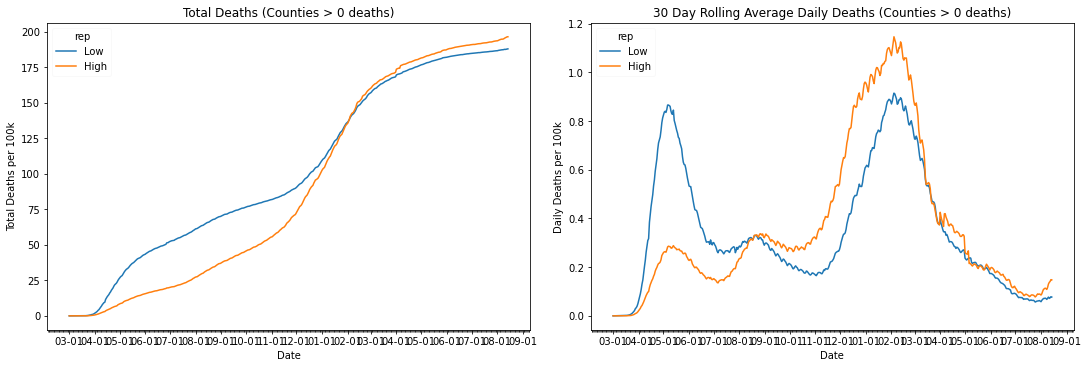

In [22]:
states=data.state_code.unique()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.2: 2020 Election Outcome - Northeast

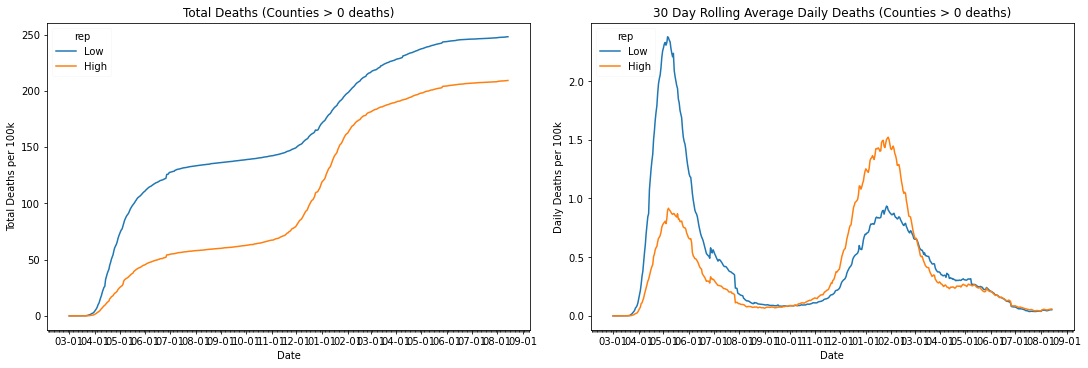

In [23]:
states = getStatesInRegion("N").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.3: 2020 Election Outcome - Southeast

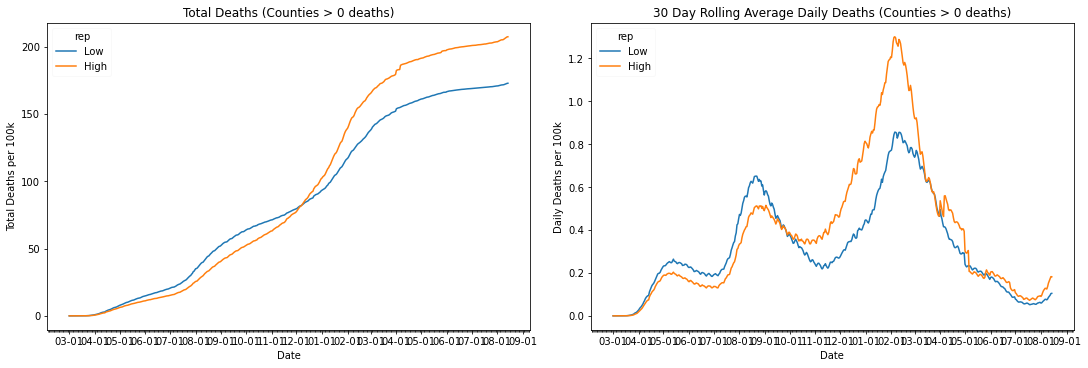

In [24]:
states = getStatesInRegion("S").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.4: 2020 Election Outcome - Midwest

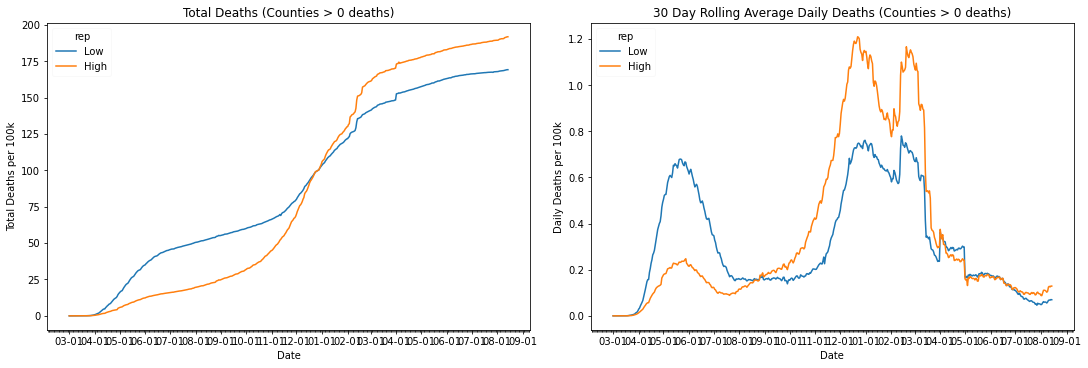

In [25]:
states = getStatesInRegion("M").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.5: 2020 Election Outcome - West

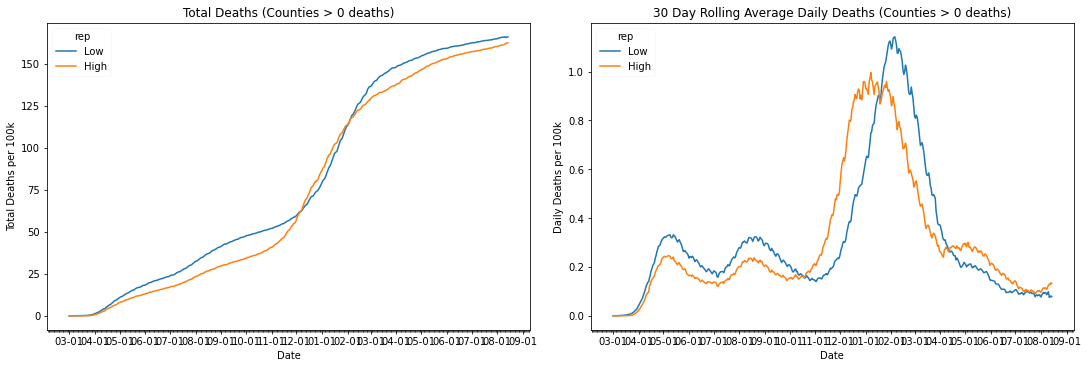

In [26]:
states = getStatesInRegion("W").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

### Section 4: Deep Dive on States with Top 10 Death Count

#### Section 4.1: New York

In [27]:
state = 'NY'
death_min = 500

##### Figure 4.1.1: Cases and Deaths (Total, Per 100k People)

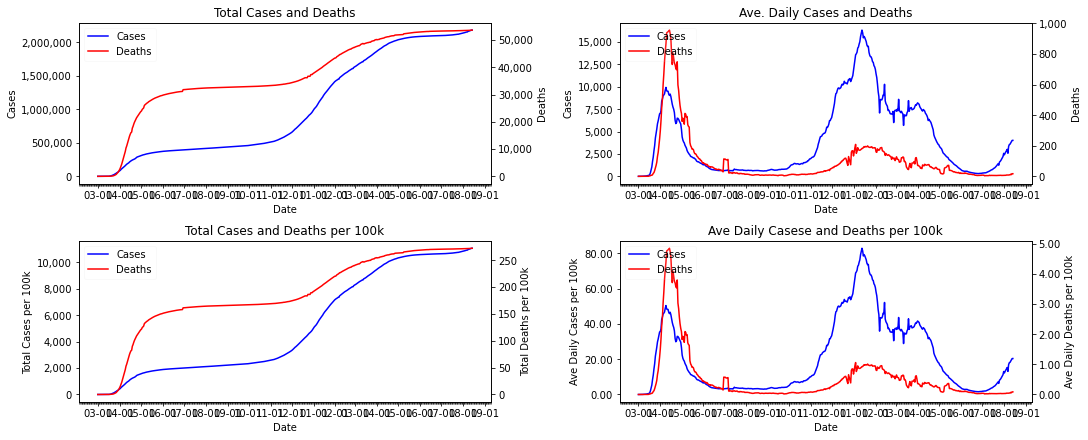

In [28]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.1.2: Deaths per 100k People - 14 Day Average

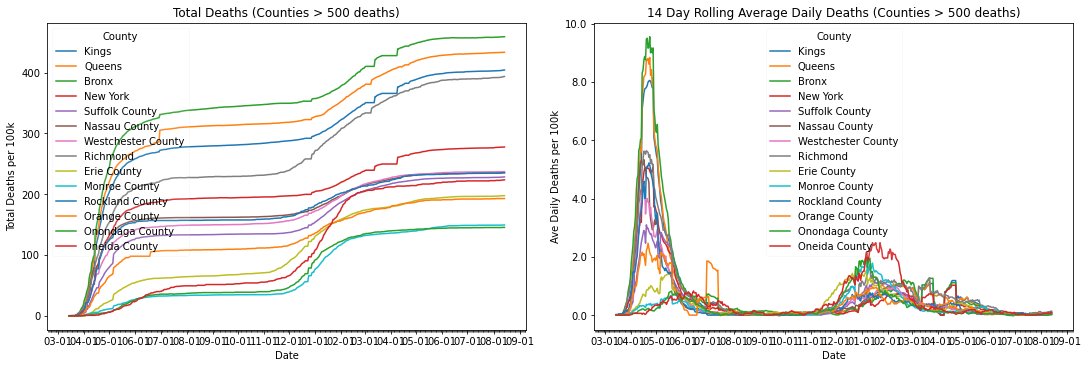

In [29]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.1.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

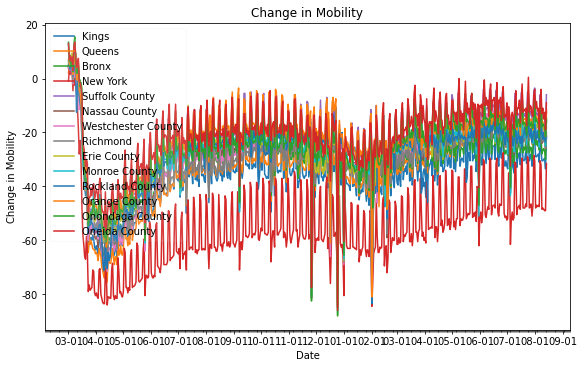

In [30]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

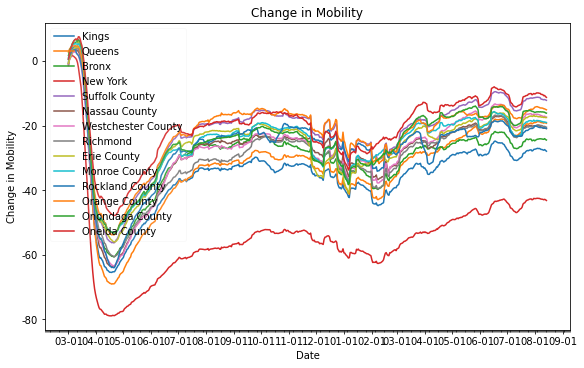

In [31]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.2: California

In [32]:
state = 'CA'
death_min = 600

##### Figure 4.2.1: Cases and Deaths (Total, Per 100k People)

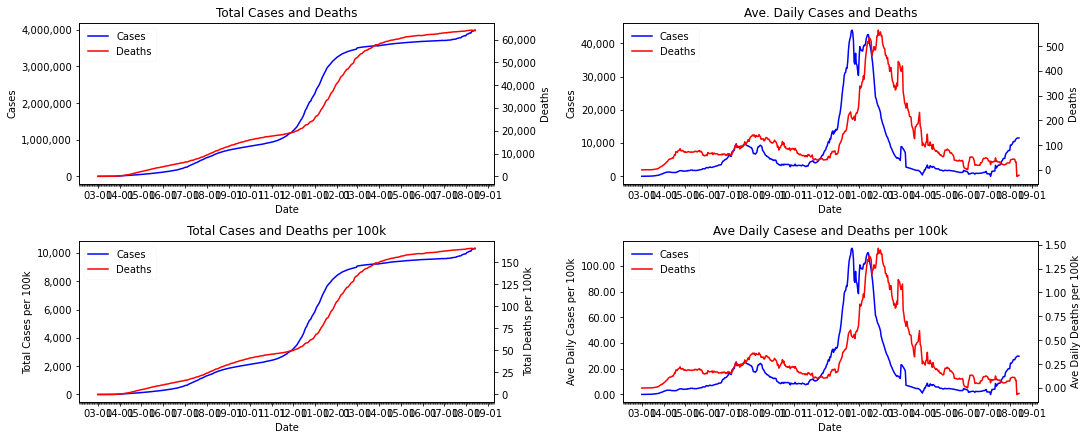

In [33]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.2.2: Deaths per 100k People - 14 Day Average

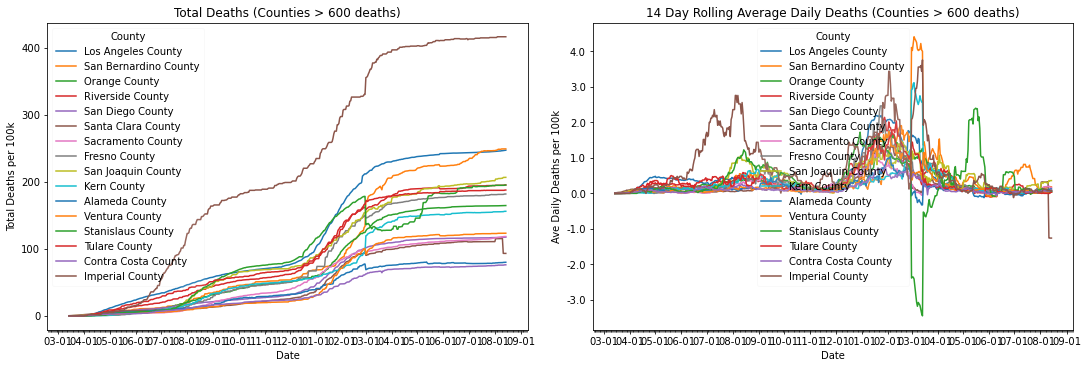

In [34]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.2.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

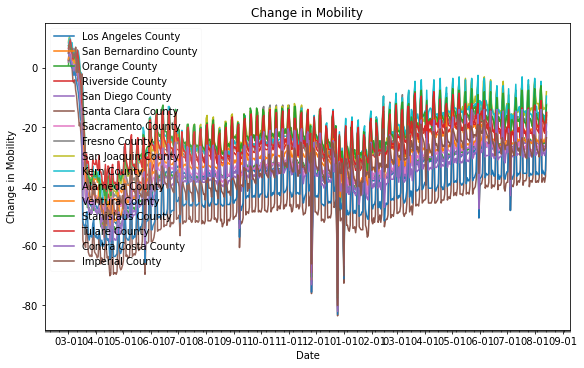

In [35]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

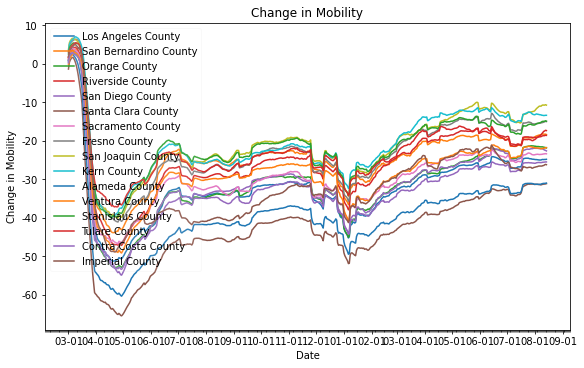

In [36]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.3: Texas

In [37]:
state = 'TX'
death_min = 500

##### Figure 4.3.1: Cases and Deaths (Total, Per 100k People)

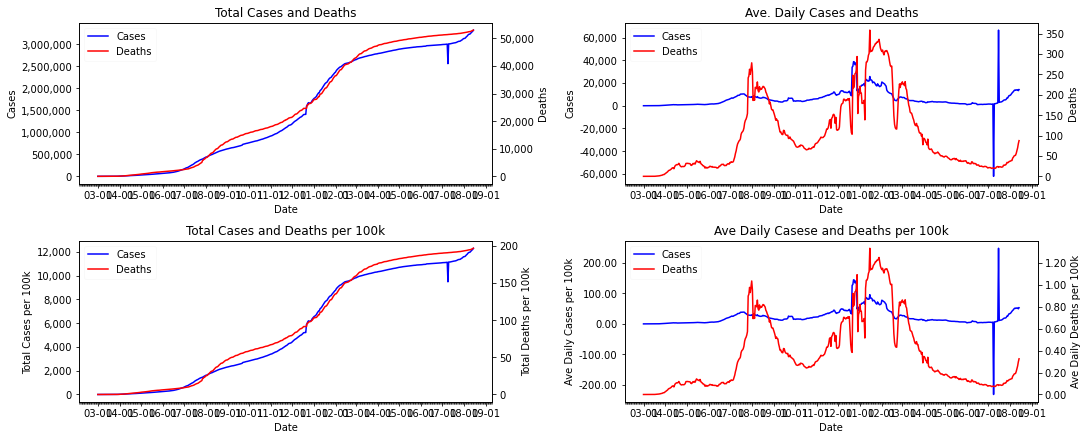

In [38]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.3.2: Deaths per 100k People - 14 Day Average

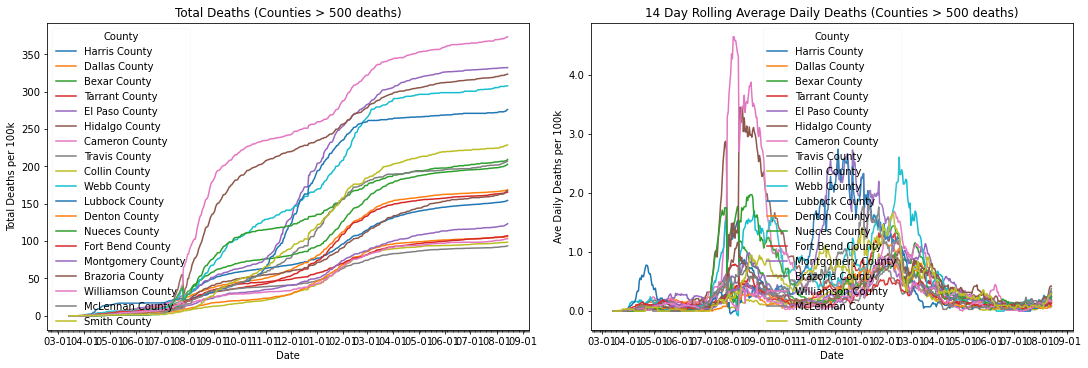

In [39]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.3.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

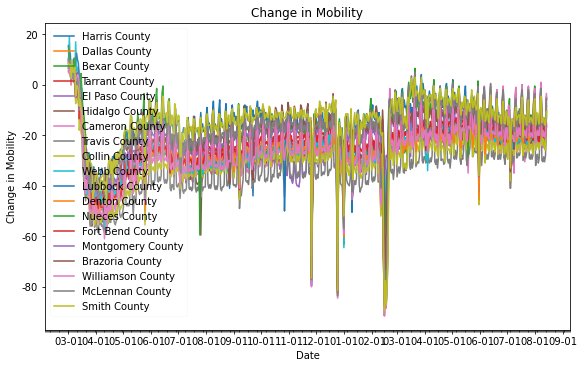

In [40]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

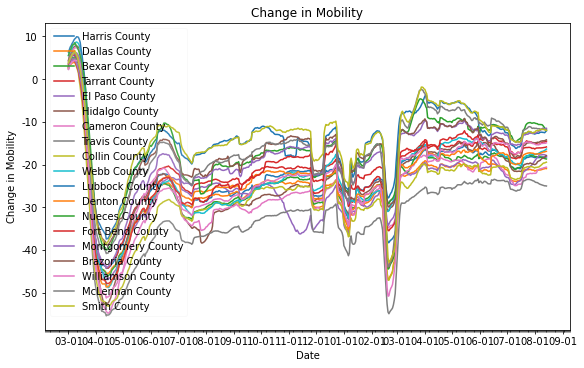

In [41]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.4: Florida

In [42]:
state = 'FL'
death_min = 500

##### Figure 4.4.1: Cases and Deaths (Total, Per 100k People)

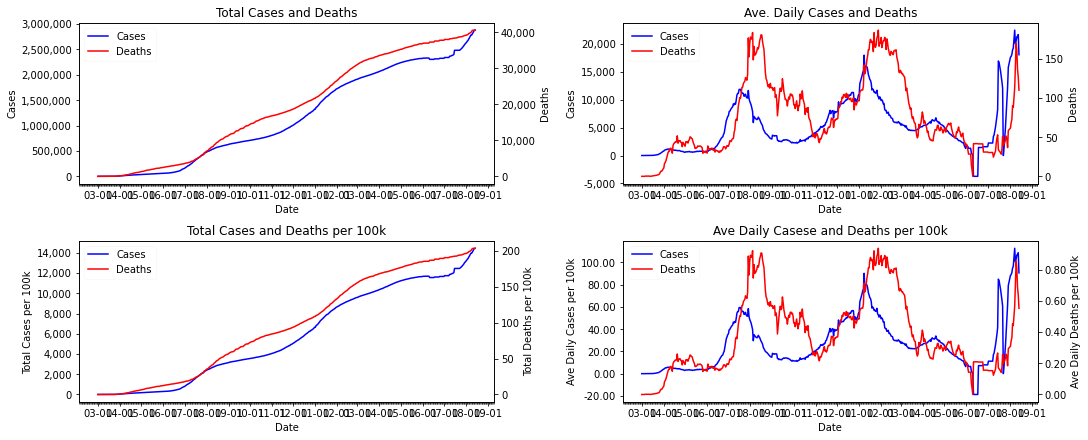

In [43]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.4.2: Deaths per 100k People - 14 Day Average

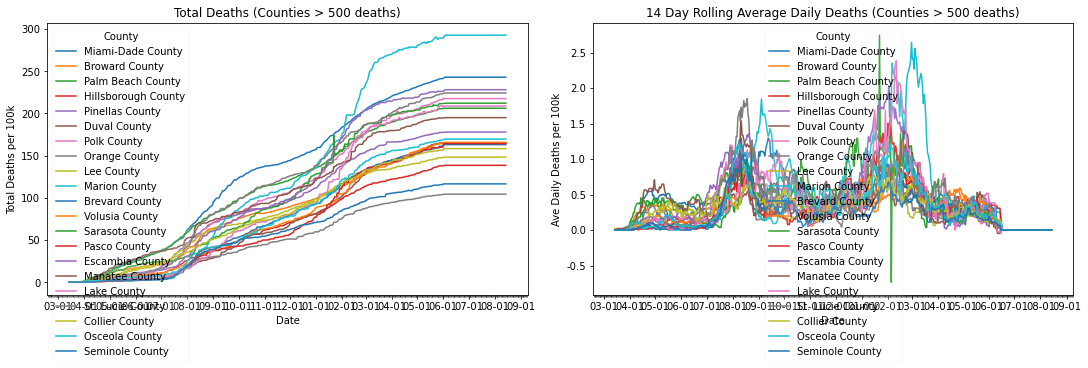

In [44]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.4.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

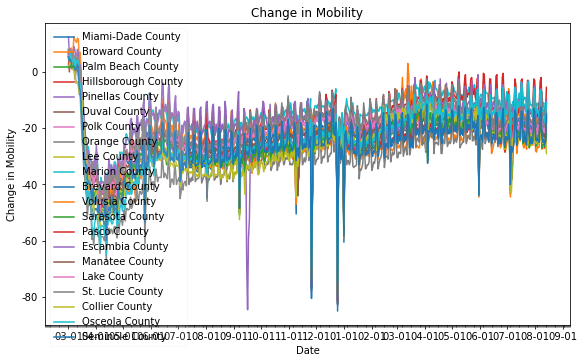

In [45]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

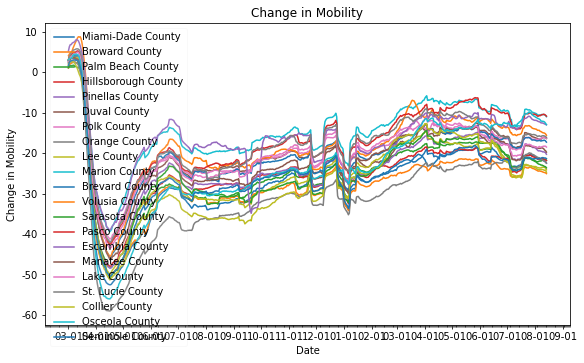

In [46]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.5: New Jersey

In [47]:
state = 'NJ'
death_min = 500

##### Figure 4.5.1: Cases and Deaths (Total, Per 100k People)

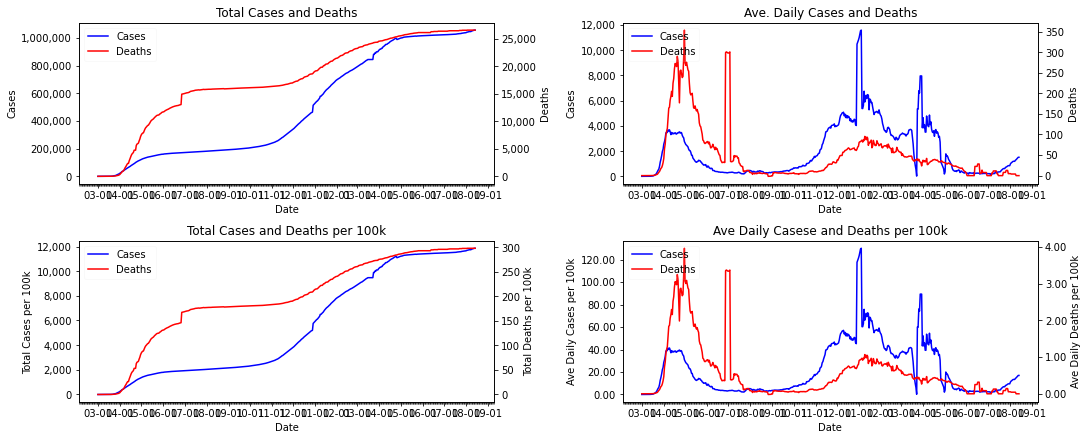

In [48]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.5.2: Deaths per 100k People - 14 Day Average

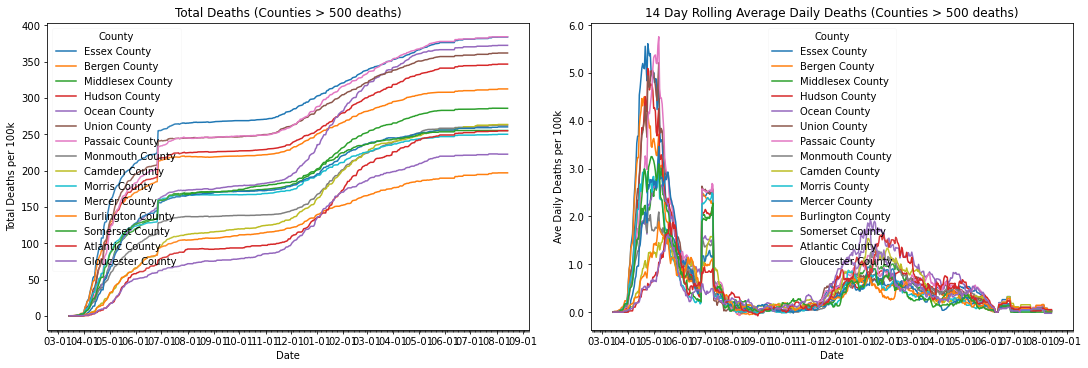

In [49]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.5.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

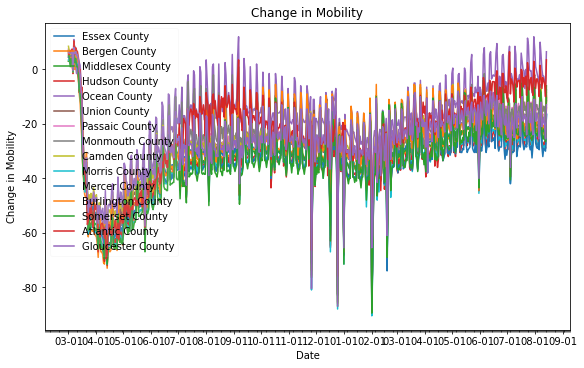

In [50]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

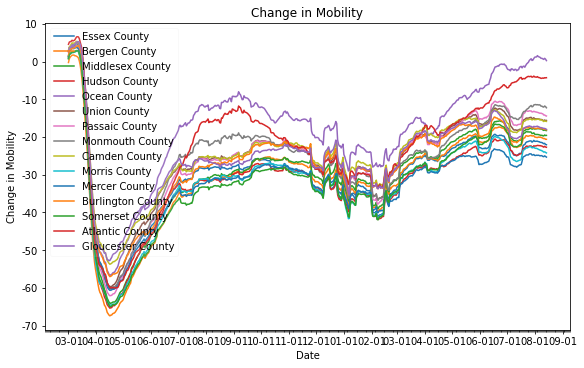

In [51]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.6: Pennsylvania

In [52]:
state = 'PA'
death_min = 500

##### Figure 4.6.1: Cases and Deaths (Total, Per 100k People)

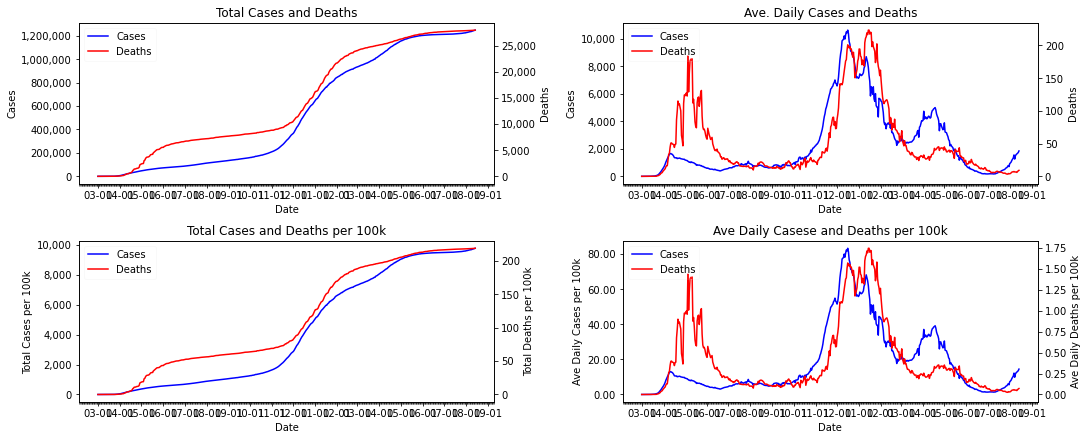

In [53]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.6.2: Deaths per 100k People - 14 Day Average

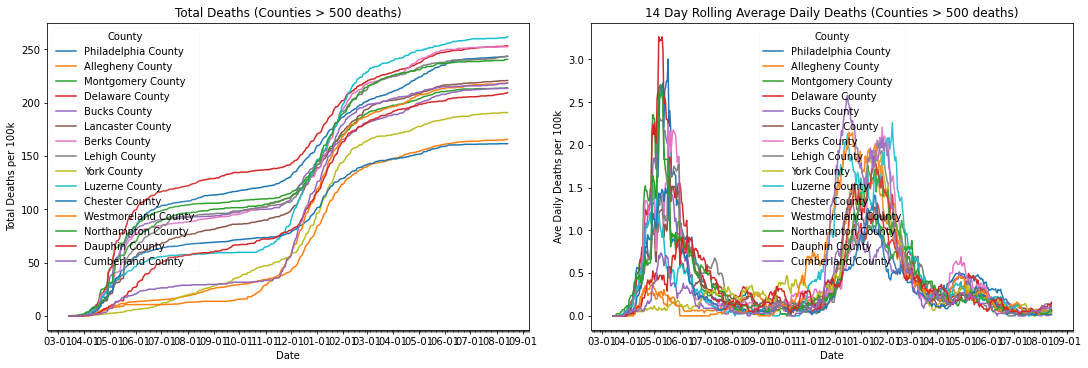

In [54]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.6.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

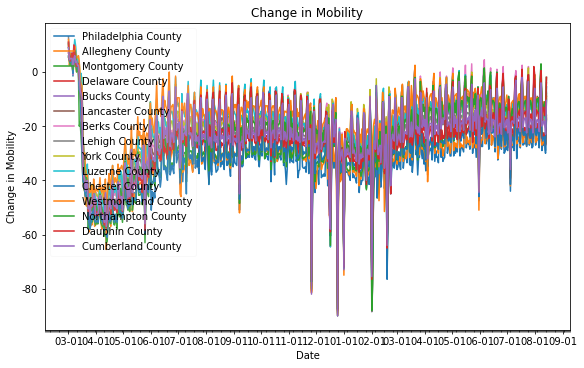

In [55]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

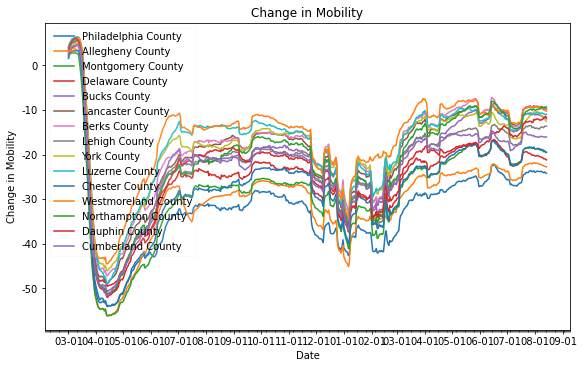

In [56]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.7: Illinois

In [57]:
state = 'IL'
death_min = 300

##### Figure 4.7.1: Cases and Deaths (Total, Per 100k People)

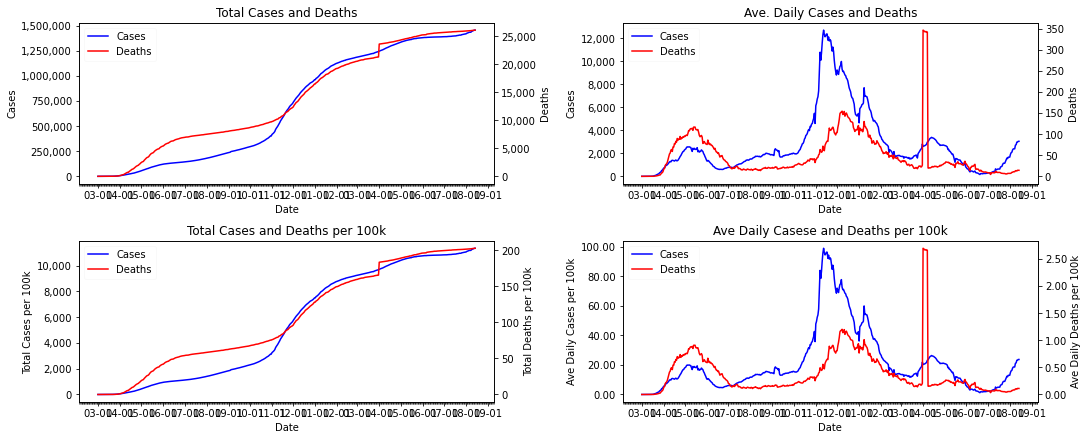

In [58]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.7.2: Deaths per 100k People - 14 Day Average

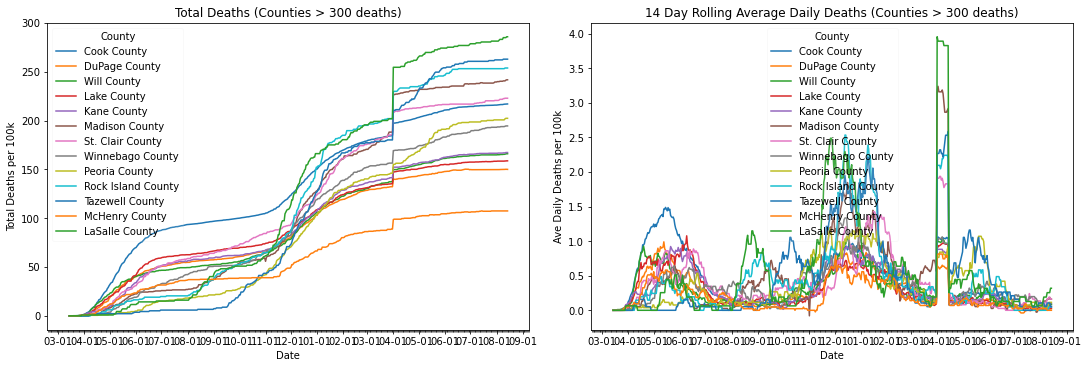

In [59]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.7.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

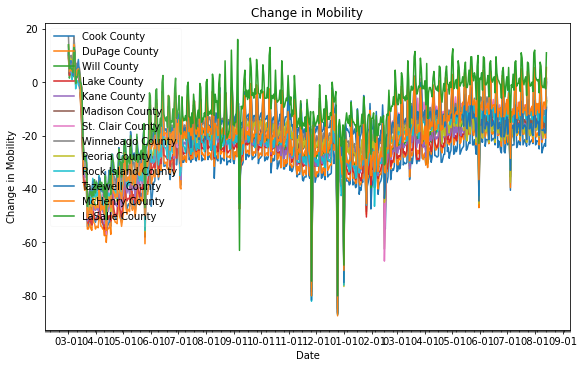

In [60]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

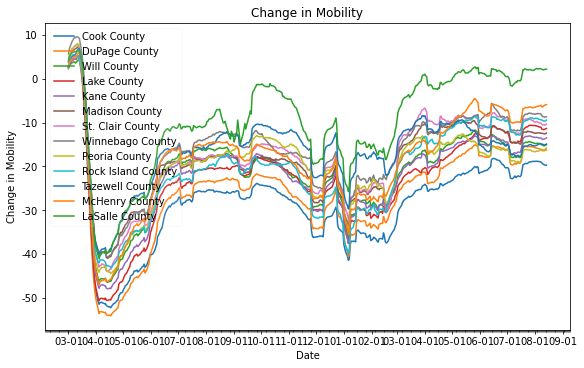

In [61]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.8: Massachusetts

In [62]:
state = 'MA'
death_min = 300

##### Figure 4.8.1: Cases and Deaths (Total, Per 100k People)

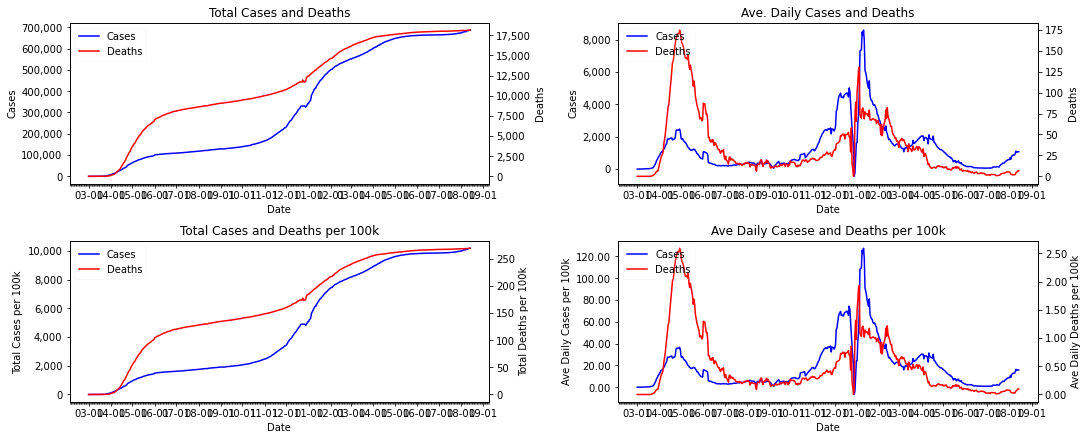

In [63]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.8.2: Deaths per 100k People - 14 Day Average

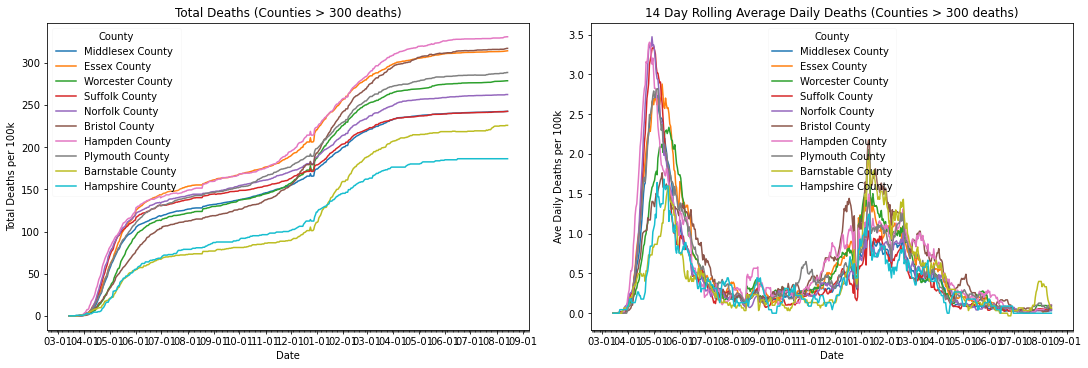

In [64]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.8.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

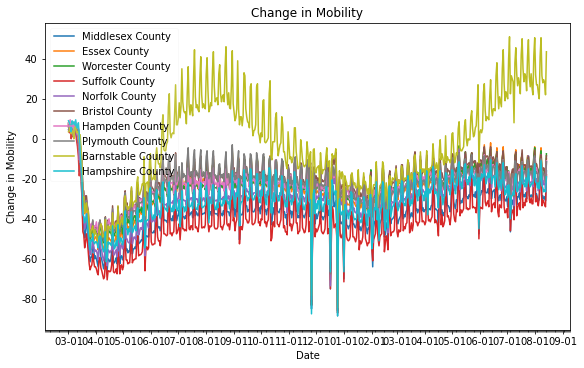

In [65]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

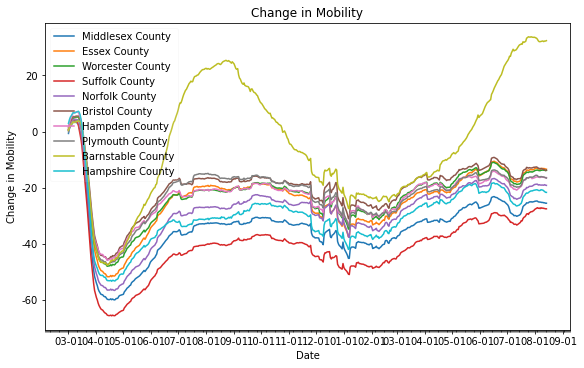

In [66]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.9: Arizona

In [67]:
state = 'AZ'
death_min = 300

##### Figure 4.9.1: Cases and Deaths (Total, Per 100k People)

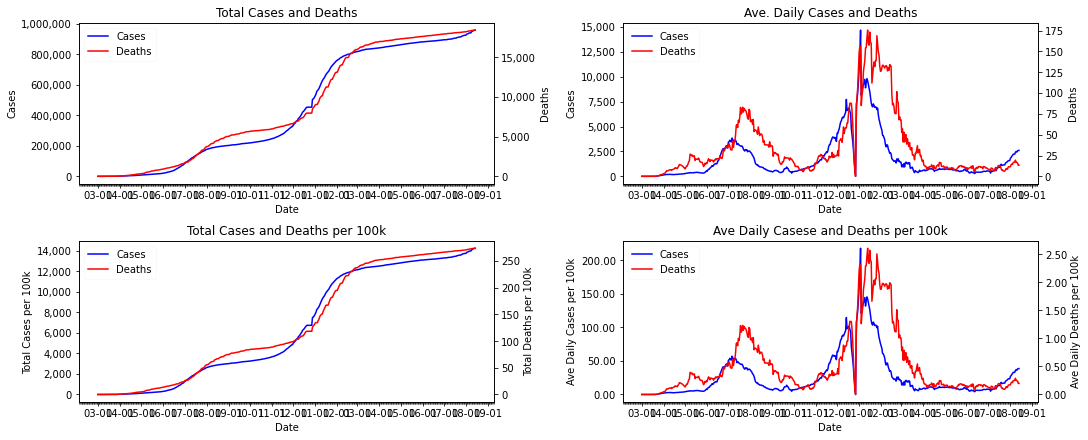

In [68]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.9.2: Deaths per 100k People - 14 Day Average

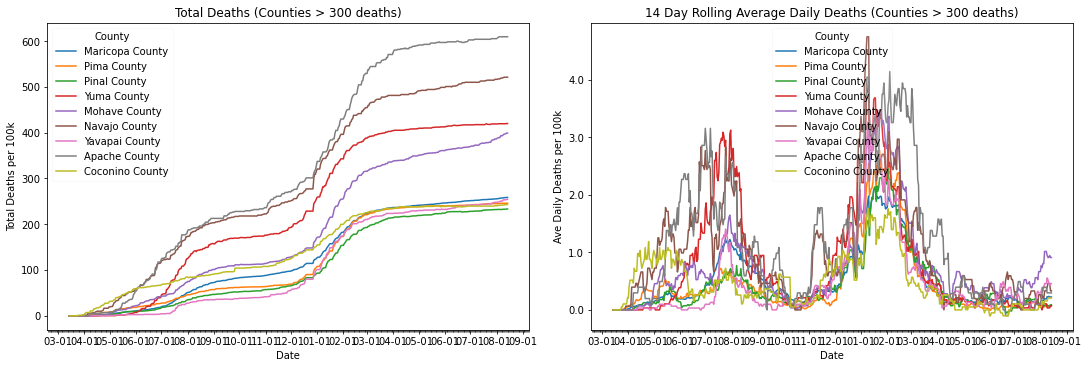

In [69]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.9.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

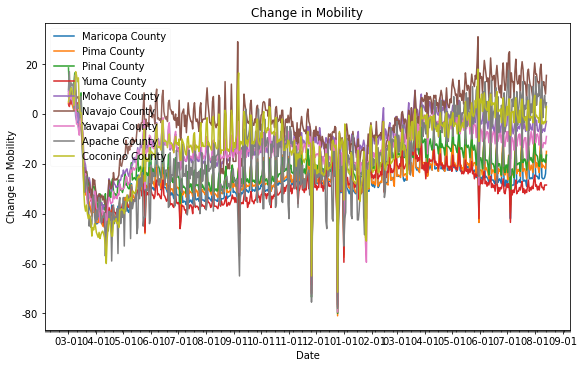

In [70]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

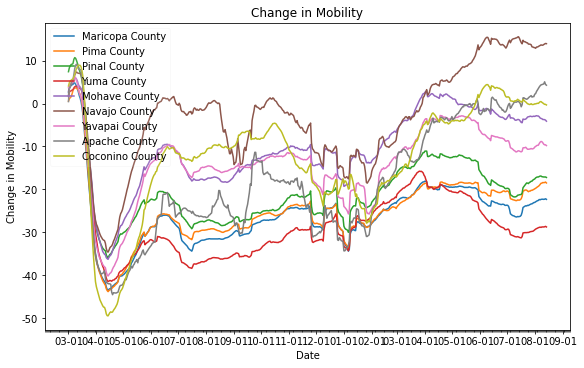

In [71]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.10: Michigan

In [72]:
state = 'MI'
death_min = 300

##### Figure 4.10.1: Cases and Deaths (Total, Per 100k People)

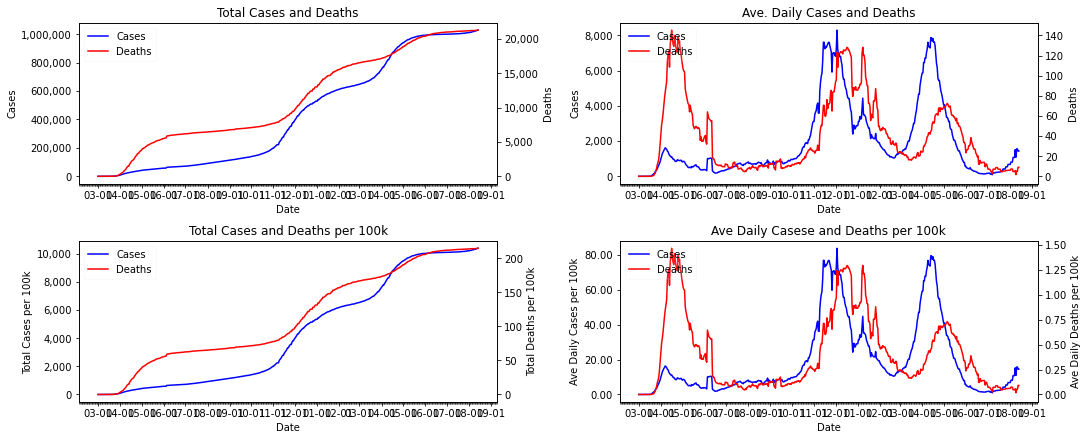

In [73]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.10.2: Deaths per 100k People - 14 Day Average

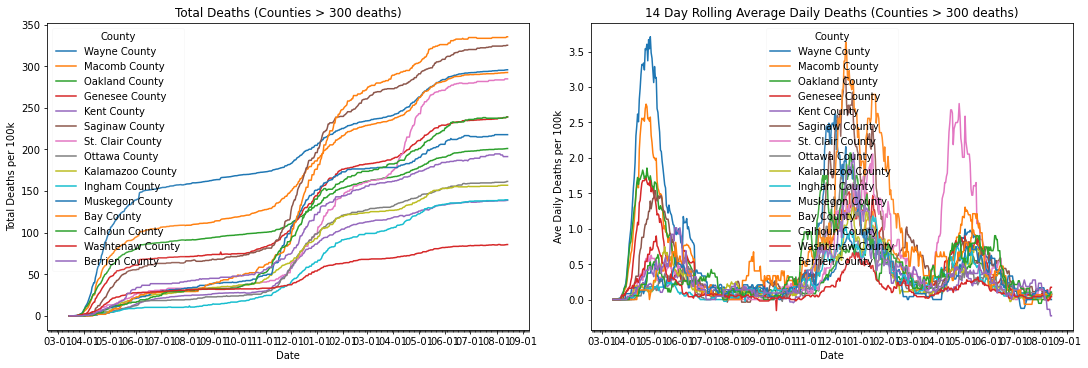

In [74]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.10.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

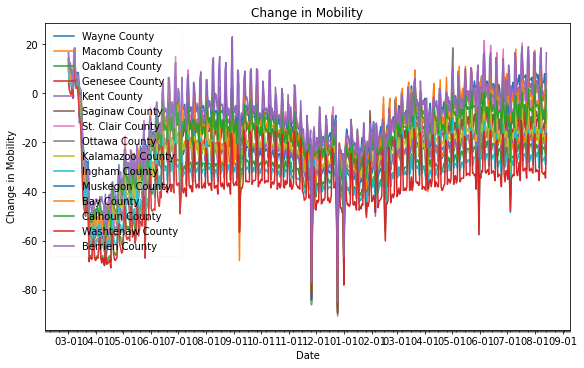

In [75]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

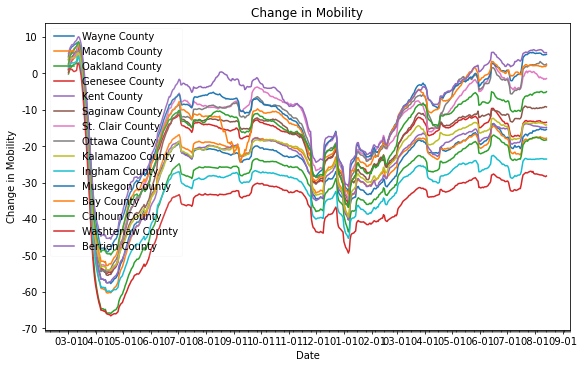

In [76]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.11: Ohio

In [77]:
state = 'OH'
death_min = 300

##### Figure 4.11.1: Cases and Deaths (Total, Per 100k People)

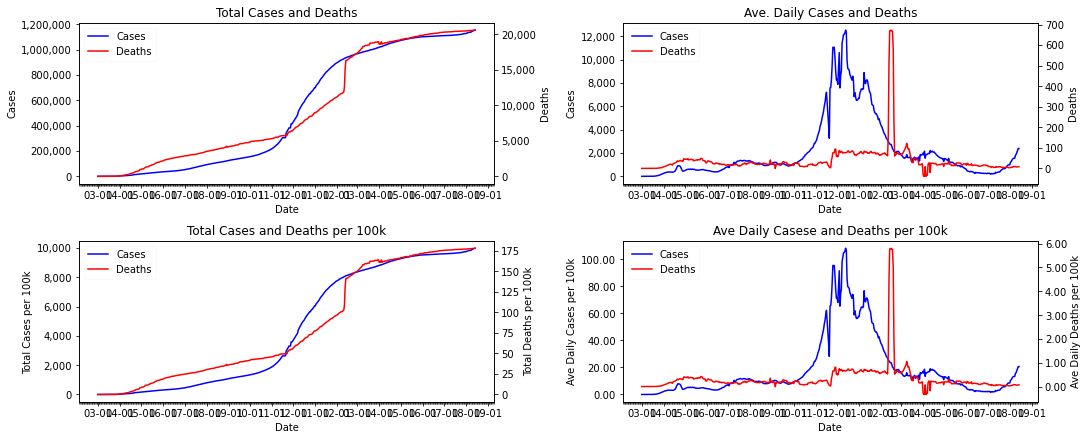

In [78]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.11.2: Deaths per 100k People - 14 Day Average

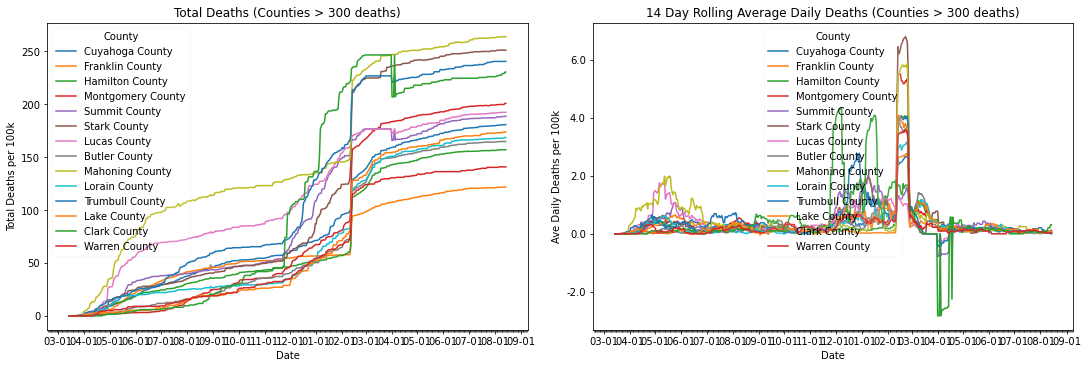

In [79]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.11.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

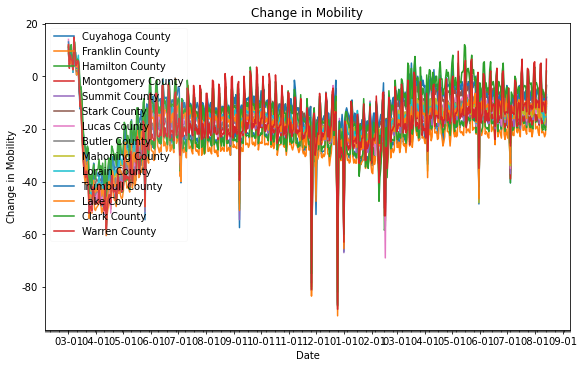

In [80]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

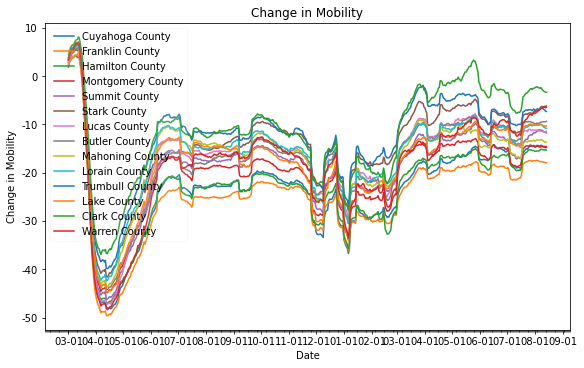

In [81]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.12: Indiana

In [82]:
state = 'IN'
death_min = 300

##### Figure 4.12.1: Cases and Deaths (Total, Per 100k People)

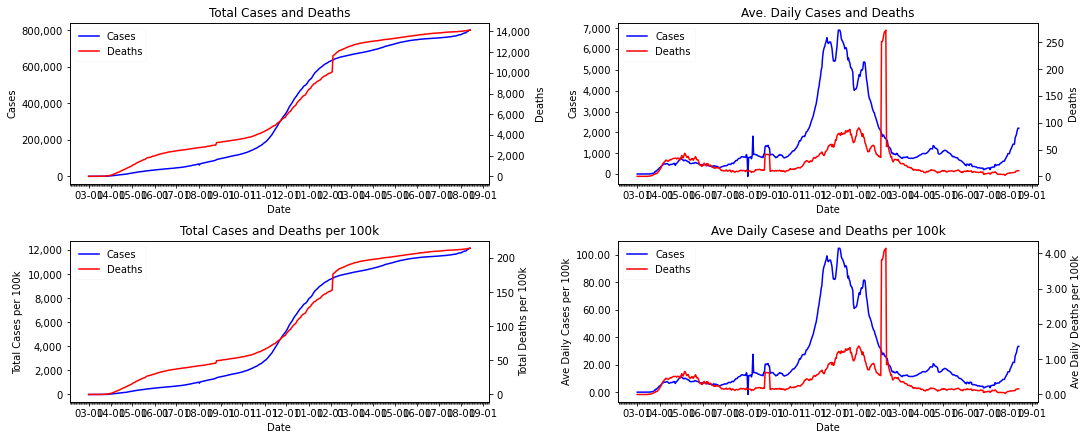

In [83]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.12.2: Deaths per 100k People - 14 Day Average

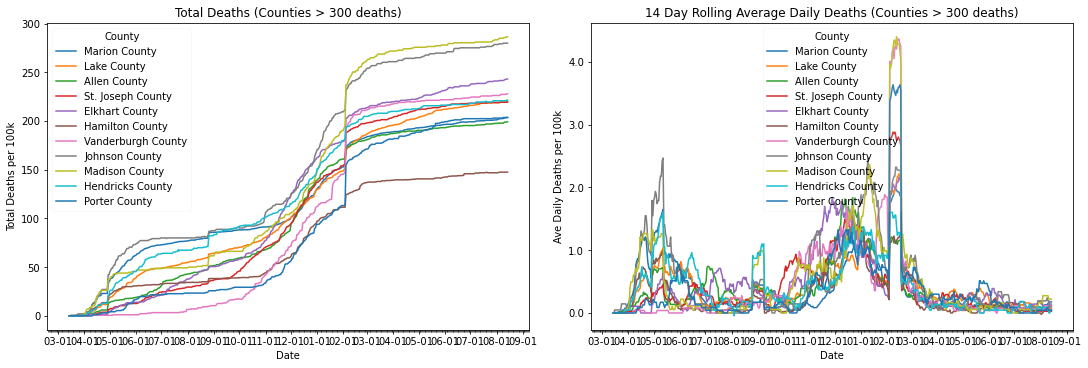

In [84]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.12.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

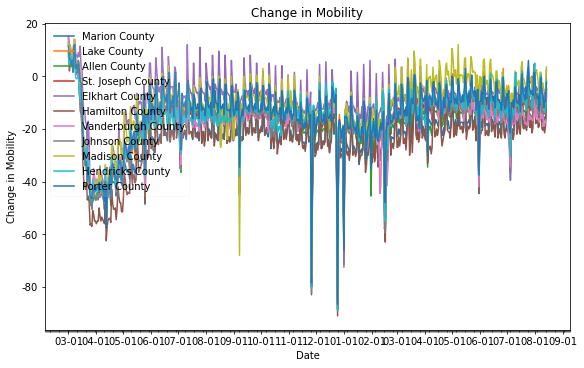

In [85]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

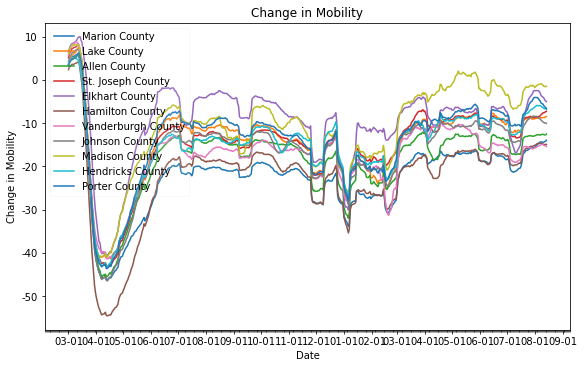

In [86]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)